<img src = "images/health2.fw.png">

### 1. Entendimento do Negócio

As empresas de plano de saúde trabalham com os variados tipos de clientes, desde jovens até idosos, sendo saudáveis ou
não. Os valores gastos pessoais de cada cliente podem variar bastante sendo influenciado por uma série de fatores
como, por exemplo, número de dependentes, idade do beneficiário entre outros. A proposta é construir um modelo que preveja
com uma acurácia acima de 70% os gastos dos clientes novos, para que a empresa de Seguros antecipe seu respectivo planejamento financeiro
para atendê-los melhor. A base de dados contém uma amostra de 1339 clientes, sendo 7 colunas. Observe:

* idade: idade do beneficiário principal

* sex: sexo do contratante do seguro, feminino, masculino

* bmi: índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,índice objetivo de peso corporal (kg / m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9. 

* children: Número de filhos cobertos pelo seguro saúde / Número de dependentes

* smoker: Se o benefiário principal é fumante ou não.

* region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

* charges: despesas médicas individuais cobradas pelo seguro saúde. Target, valor a prever.

Para complementar o trabalho, um dashboard será construído com a base atual.
Tecnologias que serão usadas: Python

Link: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

### 2. Análise Exploratória

### Importação dos pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as estat
import scipy.stats as st
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

### Extração dos dados nas bases

In [2]:
try:
    registros = pd.read_csv('bases/insurance.csv')
except FileNotFoundError:
    print('Arquivo não encontrado!')
else:
    print('Quantidade de registros sendo LINHAS,COLUNAS '+ str(registros.shape))

Quantidade de registros sendo LINHAS,COLUNAS (1338, 7)


In [3]:
# Visualizando alguns registros
registros.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Visualizando os tipos de dados
registros.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Visualizando estatísticas rápidas (variáveis quantitativas)
registros.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Contando os valores ausentes (nulos)
print(registros.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<h2> <center> Interpretando o BoxPlot </center> </h2>
<img src = "images/box.png" height="200" width="600">

Valor mínimo: 18 
Valor máximo: 64 
Valor mediana: 39
Valor média: 39 


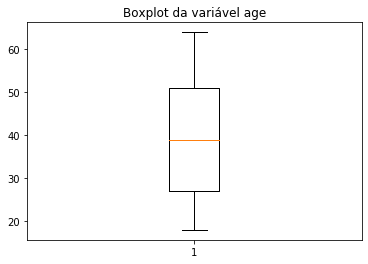

In [7]:
# Explorando variável 'age'
fig,eixo = plt.subplots()
eixo.set_title('Boxplot da variável age')
plt.boxplot(registros['age'])
print('Valor mínimo: %d ' % min(registros['age']))
print('Valor máximo: %d ' % max(registros['age']))
print('Valor mediana: %d' % estat.median(registros['age']))
print('Valor média: %d ' % estat.mean(registros['age']))
# não tem presença de outliers

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

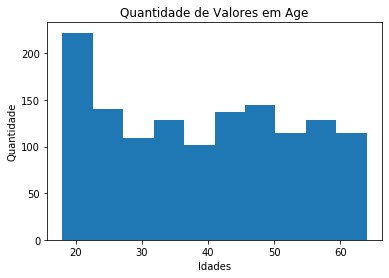

In [8]:
fig, eixo = plt.subplots()
eixo.set_title('Quantidade de Valores em Age')
eixo.set_xlabel('Idades')
eixo.set_ylabel('Quantidade')
plt.hist(registros['age'])

In [9]:
# Agrupando as idades e contando os valores 
agrupamento_idades = registros.groupby(by = ['age']).count()
agrupamento_idades.sort_values(by = ['sex'],ascending=False,inplace=True)
agrupamento_idades
#agrupamento_idades
agrupamento_idades.iloc[:,0:1]

,sex
age,
18,69
19,68
20,29
51,29
45,29
46,29
47,29
48,29
50,29


In [10]:
# Agrupando as idades mais frequentes
# idades_top5 = agrupamento_idades.iloc[:5,0:1]
# idades_top5
# Agrupando, pegando idades mais frequentes
resumo_idades = agrupamento_idades.iloc[:,0:1]
resumo_idades.head(5)

,sex
age,
18,69
19,68
20,29
51,29
45,29


### Exploração sex 

In [11]:
# Agrupando o sexo para contar quantidade e percentuais
contagem_sexo = registros.groupby(by = ['sex']).count().iloc[:,0].rename('contagem')
print(contagem_sexo)
print('Total de registros: %d' % len(registros))

sex
female    662
male      676
Name: contagem, dtype: int64
Total de registros: 1338


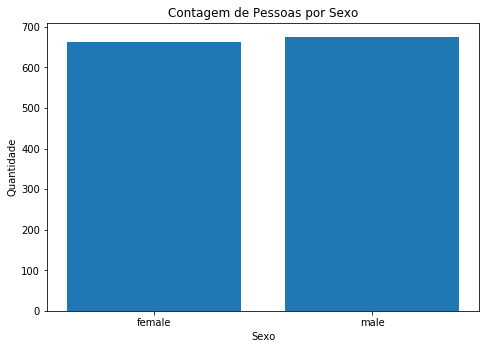

In [12]:
# Grafico de barras
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Contagem de Pessoas por Sexo')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Sexo')
ax.bar(x = contagem_sexo.index,height = contagem_sexo.values)
plt.show()

### Exploração da variável bmi

Valor mínimo: 15 
Valor máximo: 53 
Valor mediana: 30
Valor média: 30 


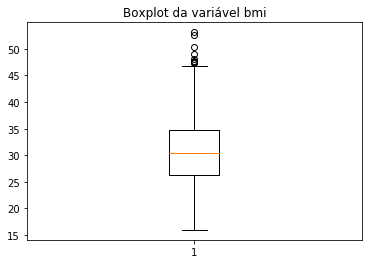

In [13]:
fig,eixo = plt.subplots()
eixo.set_title('Boxplot da variável bmi')
plt.boxplot(registros['bmi'])
print('Valor mínimo: %d ' % min(registros['bmi']))
print('Valor máximo: %d ' % max(registros['bmi']))
print('Valor mediana: %d' % estat.median(registros['bmi']))
print('Valor média: %d ' % estat.mean(registros['bmi']))

In [14]:
### Conferindo se estamos diante de distribuição normal, antes de remover os valores outliers.
k2, p = st.normaltest(registros['bmi'])
alpha = 1e-3 #0,001 , e 2,71, milli
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("A hipótese nula pode ser rejeitada. Estamos em uma distribuição normal.")
else:
    print("A hipótese nula não pode ser rejeitada.")

p = 0.000152138
A hipótese nula pode ser rejeitada. Estamos em uma distribuição normal.


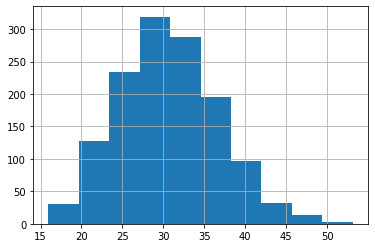

In [15]:
# Conferindo histograma.
registros['bmi'].hist()

### Tratando valores outliers

Formas de tratar: remover, realizar análise separada apenas com os outliers, clusterizar para corrigir valores. Iremos remover, já que são poucos.

In [16]:
registros['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<img src = "images/distribuicaonormal.png">

In [17]:
# Calculando Estatísticas Básicas
registros_media, registros_stdv = estat.mean(registros['bmi']), estat.stdev(registros['bmi'])
# Identificando outliers
ponto_corte = registros_stdv * 3
# Os que estão abaixo da média, os que estão acima de média, considerando desvio padrão +3 ou -3
lower, upper = registros_media - ponto_corte, registros_media + ponto_corte

In [18]:
# Identificando outliers
outliers_bmi = [x for x in registros['bmi'] if x < lower or x > upper]
outliers_bmi

[49.06, 50.38, 52.58, 53.13]

In [19]:
# Removendo outliers
outliers_removed_bmi = [x for x in registros['bmi']  if x > lower and x < upper]

In [20]:
outliers_removed_bmi

[27.9,
 33.77,
 33.0,
 22.705,
 28.88,
 25.74,
 33.44,
 27.74,
 29.83,
 25.84,
 26.22,
 26.29,
 34.4,
 39.82,
 42.13,
 24.6,
 30.78,
 23.845,
 40.3,
 35.3,
 36.005,
 32.4,
 34.1,
 31.92,
 28.025,
 27.72,
 23.085,
 32.775,
 17.385,
 36.3,
 35.6,
 26.315,
 28.6,
 28.31,
 36.4,
 20.425,
 32.965,
 20.8,
 36.67,
 39.9,
 26.6,
 36.63,
 21.78,
 30.8,
 37.05,
 37.3,
 38.665,
 34.77,
 24.53,
 35.2,
 35.625,
 33.63,
 28.0,
 34.43,
 28.69,
 36.955,
 31.825,
 31.68,
 22.88,
 37.335,
 27.36,
 33.66,
 24.7,
 25.935,
 22.42,
 28.9,
 39.1,
 26.315,
 36.19,
 23.98,
 24.75,
 28.5,
 28.1,
 32.01,
 27.4,
 34.01,
 29.59,
 35.53,
 39.805,
 32.965,
 26.885,
 38.285,
 37.62,
 41.23,
 34.8,
 22.895,
 31.16,
 27.2,
 27.74,
 26.98,
 39.49,
 24.795,
 29.83,
 34.77,
 31.3,
 37.62,
 30.8,
 38.28,
 19.95,
 19.3,
 31.6,
 25.46,
 30.115,
 29.92,
 27.5,
 28.025,
 28.4,
 30.875,
 27.94,
 35.09,
 33.63,
 29.7,
 30.8,
 35.72,
 32.205,
 28.595,
 27.94,
 27.17,
 23.37,
 37.1,
 23.75,
 28.975,
 31.35,
 33.915,
 28.785,
 28.3

In [21]:
print('Quantidade de outliers bmi identificados: %d ' % len(outliers_bmi))
print('Quantidade de amostra bmi sem outlers: %d ' % len(outliers_removed_bmi))
print('Percentual de amostra bmi com outlers: %f ' % (len(outliers_bmi)/len(registros)))
print('Quantidade de amostra total: %d ' % len(registros))

Quantidade de outliers bmi identificados: 4 
Quantidade de amostra bmi sem outlers: 1334 
Percentual de amostra bmi com outlers: 0.002990 
Quantidade de amostra total: 1338 


In [22]:
# Remoção dos outliers baseados em Método do Desvio Padrão. Os dados devem estar em distribuição normal.
registros.drop(registros[(registros.bmi < lower) | (registros.bmi > upper)].index,inplace = True)

In [23]:
# Verificando se realmente foram removidos
print(len(registros))

1334


In [24]:
# Identificando outliers, check se foram removidos
outliers_bmi = [x for x in registros['bmi'] if x < lower or x > upper]
outliers_bmi

[]

### Exploração da variável childen

In [25]:
registros['children'].describe()

count    1334.000000
mean        1.096702
std         1.206548
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

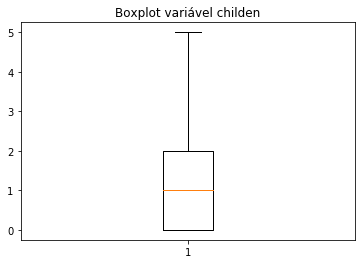

In [26]:
fig, eixo = plt.subplots()
eixo.set_title('Boxplot variável childen')
eixo.boxplot(registros['children'])
plt.show()

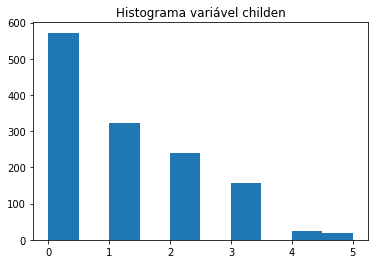

In [27]:
fig, eixo = plt.subplots()
eixo.set_title('Histograma variável childen')
plt.hist(registros['children'])
plt.show()
# Note que não tem presença de outliers

### Exploração da variável Smoker

In [28]:
print('Fumantes: %d' % len(registros[registros.smoker == 'yes']))
print('Não Fumantes: %d' % len(registros[registros.smoker == 'no']))
print('Porc Fumantes: %f' % (len(registros[registros.smoker == 'yes'])/len(registros)))
print('Porc Não Fumantes: %f' % (len(registros[registros.smoker == 'no'])/len(registros)))
print('Total de amostras: %d' % len(registros))

Fumantes: 273
Não Fumantes: 1061
Porc Fumantes: 0.204648
Porc Não Fumantes: 0.795352
Total de amostras: 1334


In [29]:
agrupamento_cont_fumantes = registros.groupby(by=['smoker']).count()
# Renomeando a série
agrupamento_cont_fumantes = agrupamento_cont_fumantes.iloc[:,1].rename('contagem')
agrupamento_cont_fumantes

smoker
no     1061
yes     273
Name: contagem, dtype: int64

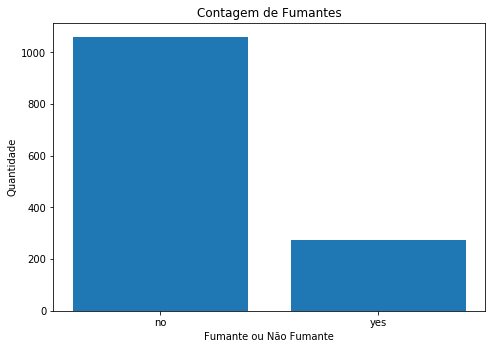

In [30]:
# Grafico de barras
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Contagem de Fumantes')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Fumante ou Não Fumante')
plt.bar(x = agrupamento_cont_fumantes.index,height = agrupamento_cont_fumantes.values)
plt.show()

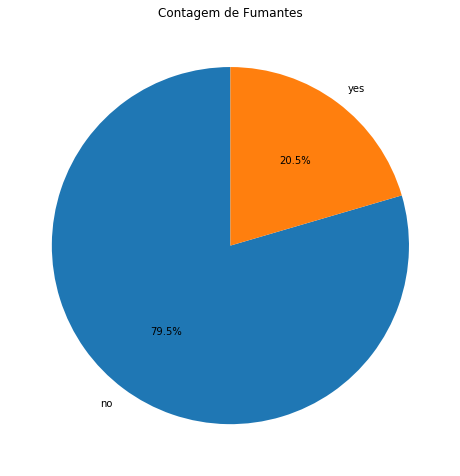

In [31]:
# Grafico de pizza
fig, ax1 = plt.subplots(figsize=(8,12))
ax1.pie(x = agrupamento_cont_fumantes.values,labels = agrupamento_cont_fumantes.index,autopct='%1.1f%%',
       startangle=90)
plt.title('Contagem de Fumantes')
plt.show()

In [32]:
# Contagem de Fumantes por sexo.
agrupamento_sexo_fumantes = registros.groupby(by=['sex','smoker']).count()
agrupamento_sexo_fumantes = agrupamento_sexo_fumantes.iloc[:,0].rename('contagem')
agrupamento_sexo_fumantes

sex     smoker
female  no        547
        yes       115
male    no        514
        yes       158
Name: contagem, dtype: int64

### Exploração region

In [33]:
#Exploração region
#Contagem de Clientes por Região
agrupamento_regiao = registros.groupby(by=['region']).count()
agrupamento_regiao = agrupamento_regiao.iloc[:,1].rename('contagem')
agrupamento_regiao

region
northeast    324
northwest    325
southeast    360
southwest    325
Name: contagem, dtype: int64

In [34]:
# Percentuais
print('Região %s' % agrupamento_regiao.index)
print('Total de Regiões: %d' % len(agrupamento_regiao.index))
print('Total de Clientes: %d' % len(registros))
for item in agrupamento_regiao.values:
    total = (item/len(registros))*100
    print('Região Perc %.2f ' % total)

Região Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object', name='region')
Total de Regiões: 4
Total de Clientes: 1334
Região Perc 24.29 
Região Perc 24.36 
Região Perc 26.99 
Região Perc 24.36 


### Exploração charges

In [35]:
# Exploração charges
registros.charges.describe()

count     1334.000000
mean     13265.622751
std      12089.666548
min       1121.873900
25%       4746.521225
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Valor mínimo: 1121 
Valor máximo: 63770 
Valor mediana: 9382
Valor média: 13265 


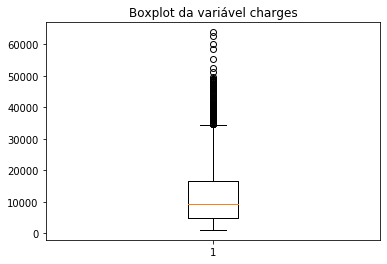

In [36]:
fig,eixo = plt.subplots()
eixo.set_title('Boxplot da variável charges')
plt.boxplot(registros['charges'])
print('Valor mínimo: %d ' % min(registros['charges']))
print('Valor máximo: %d ' % max(registros['charges']))
print('Valor mediana: %d' % estat.median(registros['charges']))
print('Valor média: %d ' % estat.mean(registros['charges']))

In [37]:
# Note que existem bastante valores outiliers, vamos retirá-los. 

In [38]:
# Calculando Estatísticas Básicas
registros_media, registros_stdv = estat.mean(registros['charges']), estat.stdev(registros['charges'])
# Identificando outliers
ponto_corte = registros_stdv * 3
# Os que estão abaixo da média, os que estão acima de média, considerando desvio padrão +3 ou -3
lower, upper = registros_media - ponto_corte, registros_media + ponto_corte

In [39]:
# Identificando outliers
outliers_charges = [x for x in registros['charges'] if x < lower or x > upper]
outliers_charges

[51194.55914,
 63770.42801,
 58571.074479999996,
 55135.402089999996,
 52590.82939,
 60021.39897,
 49577.6624,
 62592.87309]

In [40]:
# Esses não são outiliers
outliers_removed_charges = [x for x in registros['charges']  if x > lower and x < upper]

In [41]:
len(registros)

1334

In [42]:
outliers_removed_charges

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.136919999997,
 2721.3208,
 27808.7251,
 1826.8429999999998,
 11090.7178,
 39611.7577,
 1837.237,
 10797.3362,
 2395.17155,
 10602.385,
 36837.467000000004,
 13228.84695,
 4149.736,
 1137.011,
 37701.8768,
 6203.90175,
 14001.1338,
 14451.83515,
 12268.63225,
 2775.19215,
 38711.0,
 35585.576,
 2198.18985,
 4687.7970000000005,
 13770.0979,
 1625.43375,
 15612.19335,
 2302.3,
 39774.2763,
 48173.361,
 3046.062,
 4949.7587,
 6272.4772,
 6313.759,
 6079.6715,
 20630.28351,
 3393.35635,
 3556.9223,
 12629.8967,
 38709.176,
 2211.13075,
 3579.8287,
 23568.272,
 37742.5757,
 8059.6791,
 47496.49445,
 13607.36875,
 34303.1672,
 23244.7902,
 5989.52365,
 8606.2174,
 4504.6624,
 30166.618169999998,
 4133.64165,
 14711.7438,
 1743.214,
 14235.072,
 6389.37785,
 5920.1041,
 17663.1442,
 16577.7795,
 6799.4580000000005,
 11741.726,
 11946.6259,
 7726.854,
 11356.6609,
 3947.4131,
 153

In [43]:
print('Quantidade de outliers charges identificados: %d ' % len(outliers_charges))
print('Quantidade de amostra charges sem outlers: %d ' % len(outliers_removed_charges))
print('Percentual de amostra charges com outlers: %f ' % (len(outliers_charges)/len(registros)))
print('Quantidade de amostra total: %d ' % len(registros))

Quantidade de outliers charges identificados: 8 
Quantidade de amostra charges sem outlers: 1326 
Percentual de amostra charges com outlers: 0.005997 
Quantidade de amostra total: 1334 


In [44]:
# Remoção dos outliers baseados em Método do Desvio Padrão. Os dados devem estar em distribuição normal.
registros.drop(registros[(registros.charges < lower) | (registros.charges > upper)].index,inplace = True)

In [45]:
# Verificando se foram removidos
outliers_charges = [x for x in registros['charges'] if x < lower or x > upper]
outliers_charges

[]

In [46]:
len(registros)

1326

### Técnicas de Padronização e Normalização

Ambas técnicas têm como objetivo colocar os dados na mesma ordem de grandeza, ou seja, mesma escala. Padronizar teremos uma média 0 e desvio padrão de 1.
Normalizar teremos as variáveis no  intervalo de 0 a 1, ou -1 a 1 (caso contenha valores negativos). 

<img src = 'images/padronizar.PNG'>

In [47]:
registros.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Normalizar

In [48]:
# Utilizando MinMaxScaler
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
colunas_num = ['age','bmi','children','charges']
scaler_data = scaler.fit_transform(registros[colunas_num])
scaler_data

array([[0.02173913, 0.37184678, 0.        , 0.32943753],
       [0.        , 0.55465587, 0.2       , 0.01261649],
       [0.2173913 , 0.5306758 , 0.6       , 0.06954443],
       ...,
       [0.        , 0.65057614, 0.        , 0.01061603],
       [0.06521739, 0.30644659, 0.        , 0.01851831],
       [0.93478261, 0.40828402, 0.        , 0.58558911]])

In [49]:
# Função Reversa, escala original. Aplicando para todos.
scaler.inverse_transform(scaler_data)

array([[1.90000000e+01, 2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [50]:
# Aplicando para uma para visualizar o resultado. Exemplo de age
scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 
colunas_num = ['age']
scaler_data_age = scaler.fit_transform(registros[colunas_num])
scaler_data_age

array([[0.02173913],
       [0.        ],
       [0.2173913 ],
       ...,
       [0.        ],
       [0.06521739],
       [0.93478261]])

In [51]:
type(registros['age'])
registros['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1326, dtype: int64

In [52]:
type(scaler_data_age)

numpy.ndarray

In [53]:
# Função Reversa, escala original. 
scaler.inverse_transform(scaler_data_age)

array([[19.],
       [18.],
       [28.],
       ...,
       [18.],
       [21.],
       [61.]])

In [54]:
# print('Valor média: %d ' % np.mean(scaler_data))
# print('Valor desvio padrao: %d ' % np.std(scaler_data))

Note que as técnicas de pré-processamento precisam ser aplicadas nos dados de treino e também teste.

### Padronizar.

In [55]:
registros.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
scaler_padronizar = preprocessing.StandardScaler().fit(registros.iloc[:,[0,2,3,6]])
# Após executar a célula acima, a função StandardScaler irá calcular a média e desvio padrão. 
# Os algoritmos, especialmente os que trabalham com cálculo de distância como, por exemplo, regressão linear,
# esperam receber os dados na mesma escala. Quando não feito, os resultados tendem não serem bons.
registros_padronizados = scaler_padronizar.transform(registros.iloc[:,[0,2,3,6]])

In [57]:
registros_padronizados

array([[-1.4397224 , -0.44521866, -0.90985003,  0.33362382],
       [-1.51101761,  0.53508645, -0.08123661, -0.96944659],
       [-0.79806549,  0.40649447,  1.57599023, -0.73530456],
       ...,
       [-1.51101761,  1.04945437, -0.90985003, -0.97767439],
       [-1.29713198, -0.79592406, -0.90985003, -0.94517266],
       [ 1.55467652, -0.24982565, -0.90985003,  1.38716349]])

In [58]:
# Exemplo de uma variável
scaler_padronizar_age = preprocessing.StandardScaler().fit(registros.iloc[:,[0]])
registros_padronizados_age = scaler_padronizar_age.transform(registros.iloc[:,[0]])
registros['age'].describe()

count    1326.000000
mean       39.193816
std        14.031479
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [59]:
print('Valor média: %d ' % np.mean(registros_padronizados_age))
print('Valor desvio padrao: %d ' % np.std(registros_padronizados_age))

Valor média: 0 
Valor desvio padrao: 1 


In [60]:
# Escala anterior
registros['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1326, dtype: int64

In [61]:
# Mostrando a nova escala
registros_padronizados_age

array([[-1.4397224 ],
       [-1.51101761],
       [-0.79806549],
       ...,
       [-1.51101761],
       [-1.29713198],
       [ 1.55467652]])

In [62]:
# Revertendo para escala original, caso precise
scaler_padronizar_age.inverse_transform(registros_padronizados_age)

array([[19.],
       [18.],
       [28.],
       ...,
       [18.],
       [21.],
       [61.]])

### Correlação.
Obs: Para aplicá-la, os dados obrigatoriamente devem estar normalizados.

In [63]:
registros.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
data_frame_normalizado = pd.DataFrame(scaler_data,columns = ['age','bmi','children','charges'])
data_frame_normalizado.corr()

,age,bmi,children,charges
age,1.000000,0.116759,0.042138,0.304403
bmi,0.116759,1.000000,0.019666,0.187342
children,0.042138,0.019666,1.000000,0.075152
charges,0.304403,0.187342,0.075152,1.000000


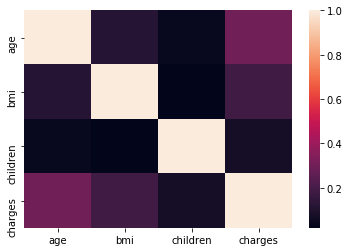

In [65]:
sns.heatmap(data_frame_normalizado.corr(), 
        xticklabels=data_frame_normalizado.columns,
        yticklabels=data_frame_normalizado.columns)

Original. Note que ele mostra apenas as variáveis quantitativas, porque não faz sentido correlação com as categóricas.
Cuidado: as vezes a variável está como quantitativa, porém não é, exemplo: sexo como 0 ou 1.
O Pandas irá interpretará esse variável como quantitativa, sendo que não é, e tenderá a fazer a correlação através
do corr(). Em suma, a análise é sempre por sua conta.

In [66]:
registros.corr()

,age,bmi,children,charges
age,1.000000,0.116759,0.042138,0.304403
bmi,0.116759,1.000000,0.019666,0.187342
children,0.042138,0.019666,1.000000,0.075152
charges,0.304403,0.187342,0.075152,1.000000


In [67]:
def converter_sexo(sexo):
    if(sexo == 'female'):
        return 0
    else:
        return 1

In [68]:
# Teste
registros['sexo_trans'] = registros.sex.apply(converter_sexo)
registros

,age,sex,bmi,children,smoker,region,charges,sexo_trans
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [69]:
# Veja a nova variável: sexo_trans. Pandas correlacionou, porém está incorreto do ponto de vista conceitual.
registros.corr()

,age,bmi,children,charges,sexo_trans
age,1.000000,0.116759,0.042138,0.304403,-0.021967
bmi,0.116759,1.000000,0.019666,0.187342,0.038771
children,0.042138,0.019666,1.000000,0.075152,0.017007
charges,0.304403,0.187342,0.075152,1.000000,0.055212
sexo_trans,-0.021967,0.038771,0.017007,0.055212,1.000000


In [70]:
registros.drop(columns=['sexo_trans'],inplace = True)
registros

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Juntando as colunas normalizadas com o dataframe original, mantendo as variáveis categóricas. Dataframe normalizado.

In [71]:
registros.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
registros_old = registros # original

for item in range(0,len(registros.columns)):
    # 0,2,3,6 variáveis quantitativas: age, bmi, children, charges
    if(item in (0,2,3,6)):
        #colunas_num = ['age']
        scaler_data = scaler.fit_transform(registros.iloc[:,[item]])
        registros.iloc[:,[item]] = scaler_data
        
registros

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.371847,0.0,yes,southwest,0.329438
1,0.000000,male,0.554656,0.2,no,southeast,0.012616
2,0.217391,male,0.530676,0.6,no,southeast,0.069544
3,0.326087,male,0.210059,0.0,no,northwest,0.436015
4,0.304348,male,0.402367,0.0,no,northwest,0.057368
...,...,...,...,...,...,...,...
1333,0.695652,male,0.467456,0.6,no,northwest,0.198098
1334,0.000000,female,0.497041,0.0,no,northeast,0.022657
1335,0.000000,female,0.650576,0.0,no,southeast,0.010616
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518


### Tratamento das variáveis categóricas.

Árvores lidam bem, algoritmos SVM, Regressão não...
Entre n técnicas, existem 2:
1 - Label Enconding. Transforma as variáveis em valores numéricos, ou seja, dados categóricos. O problema é que o algoritmo
de ML pode interpretar uma ordem entre eles, quando não há.
2 - One Hot Enconfing. Cria váras colunas, uma para cada valor da variável categórica. Define 1 como verdadeiro, as demais
linhas com 0 (falso). Veja abaixo. Desvantagem: pode acrescentar muitas novas colunas. Como nosso dataset tem apenas 4 tipos
podemos utilizar essa técnica. 

Fonte: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

<img src = 'images/onehotencond.png'>

<h3> Técnica One-Hot Encoding. </h3>

In [73]:
registros.head(5)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.371847,0.0,yes,southwest,0.329438
1,0.000000,male,0.554656,0.2,no,southeast,0.012616
2,0.217391,male,0.530676,0.6,no,southeast,0.069544
3,0.326087,male,0.210059,0.0,no,northwest,0.436015
4,0.304348,male,0.402367,0.0,no,northwest,0.057368


Reset índices

In [74]:
registros

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.371847,0.0,yes,southwest,0.329438
1,0.000000,male,0.554656,0.2,no,southeast,0.012616
2,0.217391,male,0.530676,0.6,no,southeast,0.069544
3,0.326087,male,0.210059,0.0,no,northwest,0.436015
4,0.304348,male,0.402367,0.0,no,northwest,0.057368
...,...,...,...,...,...,...,...
1333,0.695652,male,0.467456,0.6,no,northwest,0.198098
1334,0.000000,female,0.497041,0.0,no,northeast,0.022657
1335,0.000000,female,0.650576,0.0,no,southeast,0.010616
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518


In [75]:
encoding = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [76]:
encoding_registros = pd.DataFrame(encoding.fit_transform(registros.iloc[:,[1,4,5]]).toarray())
encoding_registros
# JOIN
#registros_with_enco = registros.join(encoding_registros)
#registros_with_enco
# sex 2 tipos
# smoker 2 valores
# region 4 valores
# total 8 colunas

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1321,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1322,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1323,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1324,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [77]:
# Vamos fazer o tratamento separado assim como as junções
encoding_registros_sexo = pd.DataFrame(encoding.fit_transform(registros.iloc[:,[1]]).toarray())
encoding_registros_sexo

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1321,0.0,1.0
1322,1.0,0.0
1323,1.0,0.0
1324,1.0,0.0


In [78]:
# merge 
registros_enco_sexo2 = registros.join(encoding_registros_sexo)
registros_enco_sexo2

,age,sex,bmi,children,smoker,region,charges,0,1
0,0.021739,female,0.371847,0.0,yes,southwest,0.329438,1.0,0.0
1,0.000000,male,0.554656,0.2,no,southeast,0.012616,0.0,1.0
2,0.217391,male,0.530676,0.6,no,southeast,0.069544,0.0,1.0
3,0.326087,male,0.210059,0.0,no,northwest,0.436015,0.0,1.0
4,0.304348,male,0.402367,0.0,no,northwest,0.057368,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.467456,0.6,no,northwest,0.198098,NaN,NaN
1334,0.000000,female,0.497041,0.0,no,northeast,0.022657,NaN,NaN
1335,0.000000,female,0.650576,0.0,no,southeast,0.010616,NaN,NaN
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518,NaN,NaN


In [79]:
registros_enco_sexo2.loc[[1336],:]

,age,sex,bmi,children,smoker,region,charges,0,1
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518,NaN,NaN


In [80]:
registros.loc[[1336],:]

,age,sex,bmi,children,smoker,region,charges
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518


### Usar temporário: Label Enconding

In [81]:
registros['sex'] = registros['sex'].astype('category')
registros['smoker'] = registros['smoker'].astype('category')
registros['region'] = registros['region'].astype('category')

In [82]:
registros['sex_types'] = registros['sex'].cat.codes
registros['smoker_types'] = registros['smoker'].cat.codes
registros['region_types'] = registros['region'].cat.codes

In [83]:
registros

,age,sex,bmi,children,smoker,region,charges,sex_types,smoker_types,region_types
0,0.021739,female,0.371847,0.0,yes,southwest,0.329438,0,1,3
1,0.000000,male,0.554656,0.2,no,southeast,0.012616,1,0,2
2,0.217391,male,0.530676,0.6,no,southeast,0.069544,1,0,2
3,0.326087,male,0.210059,0.0,no,northwest,0.436015,1,0,1
4,0.304348,male,0.402367,0.0,no,northwest,0.057368,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.467456,0.6,no,northwest,0.198098,1,0,1
1334,0.000000,female,0.497041,0.0,no,northeast,0.022657,0,0,0
1335,0.000000,female,0.650576,0.0,no,southeast,0.010616,0,0,2
1336,0.065217,female,0.306447,0.0,no,southwest,0.018518,0,0,3


In [84]:
# Elminando as demais que são categóricas
registros.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_types', 'smoker_types', 'region_types'],
      dtype='object')

In [85]:
registros = registros.drop(columns = ['sex','smoker','region'])

In [86]:
registros.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_types', 'smoker_types',
       'region_types'],
      dtype='object')

### Divisão das variáveis: preditoras e alvo.

In [87]:
x = registros.iloc[:,[0,1,2,4,5,6]]
y = registros.iloc[:,[3]]

In [88]:
x

,age,bmi,children,sex_types,smoker_types,region_types
0,0.021739,0.371847,0.0,0,1,3
1,0.000000,0.554656,0.2,1,0,2
2,0.217391,0.530676,0.6,1,0,2
3,0.326087,0.210059,0.0,1,0,1
4,0.304348,0.402367,0.0,1,0,1
...,...,...,...,...,...,...
1333,0.695652,0.467456,0.6,1,0,1
1334,0.000000,0.497041,0.0,0,0,0
1335,0.000000,0.650576,0.0,0,0,2
1336,0.065217,0.306447,0.0,0,0,3


In [89]:
y

,charges
0,0.329438
1,0.012616
2,0.069544
3,0.436015
4,0.057368
...,...
1333,0.198098
1334,0.022657
1335,0.010616
1336,0.018518


### Divisão de dados de treino e teste

In [90]:
?train_test_split

In [91]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3,random_state = 12)

### Definição do Modelo

In [92]:
modelo1 = LinearRegression()

### Treino do Modelo

In [93]:
reg = LinearRegression().fit(x_treino, y_treino)
reg.score(x_teste, y_teste)

0.7344786366764738

### Previsões do Modelo. 

In [94]:
previsoes = reg.predict(x_teste)

In [95]:
# Exemplos
pd.DataFrame(previsoes).head(5)

,0
0,0.668751
1,0.054428
2,0.208099
3,0.319573
4,0.305180


### Avaliação  do Modelo

No problema de Regressão Linear seja simples, ou composta contamos com basicamente 4 métricas para avaliar a performance
do modelo, sendo elas:

* 1. Teste F Significância Global. F < 0,5 é considerado bom. Diz a probabilidade de ser ao acaso a relação entre as
features e target é muito baixa. Em outras palavras, responde se pelos menos 1 das features é útil para prever (valor gasto
do plano no nosso caso).
* 2. Teste de Significância Individual. Avaliarmos as features separadamente com o valor de P, para saber o impacto na target.
P < 0,05 é bom. Valores muito baixos podem estarem sendo representados em notação científica.
* 3. Coeficientes R2 e R2 Ajustado. R2 explica o quão bem o modelo pode ser explicado pelas features. Responde: qual 
% da variabilidade da target (valor gasto no plano) é explicada pelas variáveis usadas no modelo. Uma das principais
métricas usadas. Varia entre 0-1, sendo enquanto mais alto, melhor. R2 Ajustado é útil quando precisamos comparar n
modelos diferentes (com algoritmos e features diferentes) para avaliar a performance do melhor.
* 4 - Coefiecientes. Valores encontrados durante o treinamento, através da função de custo. Não há melhor ou pior, porque
são apenas valores númericos. Cada feature tem seu coefiente. Exemplo de fórmula:
<p> </p>

* <b> y = b0 + b1X1 + b2X2 ... </b>

b0, b1, b2 são os coeficientes. b0 que não acompanha o feature, é o intercepto

* 5 - Reta de regressão. 'Plotar' ela é uma forma fácil de interpretar os resultados. Enquanto mais próxima ela estiver
próximo ou sobre os pontos, maior acurácia do modelo. 

<p> </p>
Fonte: https://scikit-learn.org/stable/modules/model_evaluation.html

### Valor dos Coeficientes

In [96]:
print('Total de features: %d ' % len(x.columns))
print('Features: ')
i = 1
for item in x.columns:
    print(str(i) + ' '+ str(item))
    i += 1

Total de features: 6 
Features: 
1 age
2 bmi
3 children
4 sex_types
5 smoker_types
6 region_types


In [97]:
# Valores dos coeficientes encontrados
reg.coef_

array([[ 0.24258648,  0.24128149,  0.05206893, -0.00253198,  0.47892835,
        -0.00601567]])

In [98]:
# Valor do intercepto
reg.intercept_

array([-0.07154072])

### Usando R2

In [99]:
#r2_score(y_true, y_pred)
r2_score(y_teste, previsoes)

0.7344786366764738

### Taxa Média de Erros.
Enquanto menor, melhor.

In [100]:
mean_squared_error(y_teste, previsoes)

0.015438436780872117

### Teste de Significância Global (F) e Individual (P)

Para os teste F e P, Sklearn não tem oferece esses recursos, vamos usar o pacote Estatístico statsmodels

In [103]:
X = np.array(registros.iloc[:,[0,1,2,4,5,6]])
Y = np.array(registros.iloc[:,[3]])

In [104]:
# é necessário adicionar uma constante a matriz X, obrigatório do pacote
X_sm = sm.add_constant(X)

In [105]:
# treino
results = sm.OLS(Y, X_sm).fit()

In [106]:
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     664.0
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:29:42   Log-Likelihood:                 916.16
No. Observations:                1326   AIC:                            -1818.
Df Residuals:                    1319   BIC:                            -1782.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0573      0.011     -5.112      0.000      -0.079      -0.035
x1             0.2446      0.011     22.151      0.000       0.223       0.266
x2             0.2132      0.018     11.668      0.000       0.177       0.249
x3             0.0526      0.014      3.799      0.000       0.025       0.080
x4            -0.0021      0.007     -0.314      0.754      -0.015       0.011
x5             0.4832      0.008     57.681      0.000       0.467       0.500
x6            -0.0074      0.003     -2.407      0.016      -0.013      -0.001
==============================================================================
Omnibus:                      268.233   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.553
Skew:                           1.165   Prob(JB):                    1.26e-119
Kurtosis:                       5.116   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note que todas as variáveis tem um valor P abaixo de 0,05, exceto a variável x4, sendo uma possível candidata de 
sair do modelo, avaliar novamente a performance. x4 é sex_types

In [107]:
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([0.48839472, 0.05466305, 0.12377998, ..., 0.06669374, 0.00192809,
       0.73423466])

In [108]:
registros.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_types', 'smoker_types',
       'region_types'],
      dtype='object')

### Feature Enginner: 1. Excluindo x4 (sex_types)

In [109]:
X = np.array(registros.iloc[:,[0,1,2,5,6]])
Y = np.array(registros.iloc[:,[3]])

In [110]:
# Retreino

In [111]:
# é necessário adicionar uma constante a matriz X, obrigatório do pacote
X_sm = sm.add_constant(X)

In [112]:
# treino
results = sm.OLS(Y, X_sm).fit()

In [113]:
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     797.4
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:29:42   Log-Likelihood:                 916.11
No. Observations:                1326   AIC:                            -1820.
Df Residuals:                    1320   BIC:                            -1789.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0582      0.011     -5.396      0.000      -0.079      -0.037
x1             0.2447      0.011     22.174      0.000       0.223       0.266
x2             0.2129      0.018     11.669      0.000       0.177       0.249
x3             0.0525      0.014      3.796      0.000       0.025       0.080
x4             0.4830      0.008     57.835      0.000       0.467       0.499
x5            -0.0073      0.003     -2.405      0.016      -0.013      -0.001
==============================================================================
Omnibus:                      268.505   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.592
Skew:                           1.166   Prob(JB):                    7.49e-120
Kurtosis:                       5.119   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Note que praticamente não houve diferença 

### Otimização
Troca de Algoritmo.

In [115]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
#.ravel will convert that array shape to (n, )
modelo = regr.fit(x_treino, np.ravel(y_treino,order = 'C'))

In [116]:
previsoes_arvore = regr.predict(x_teste)

In [117]:
r2_score(y_teste, previsoes_arvore)

0.8150203574092526

#### Ajuste de hiperparâmetros

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### Parâmetros atualmente em uso

In [118]:
for key,value in modelo.get_params().items():
    print(key,value)

bootstrap True
ccp_alpha 0.0
criterion mse
max_depth 2
max_features auto
max_leaf_nodes None
max_samples None
min_impurity_decrease 0.0
min_impurity_split None
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
n_estimators 100
n_jobs None
oob_score False
random_state 0
verbose 0
warm_start False


In [119]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#### Procurando os melhores parâmetros

In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# x_treino y_treino
modelo_grid = rf_random.fit(x_treino, y_treino)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   43.0s finished
/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [130]:
# Note os melhores parâmetros que ele encontrou.
modelo_grid.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [122]:
# Avaliando com o modelo anterior
previsoes = modelo_grid.predict(x_teste)

In [123]:
# Comparando com a métrica R2, note que o valor subiu
# antes: 0.8150203574092526
r2_score(y_teste, previsoes)

0.8370415835665184

In [129]:
# anterior: 0.015438436780872117
mean_squared_error(y_teste, previsoes)

0.009475031231117618

Podemos ainda tentar otimizar o algoritmo, mas optaremos por encerrar o exercício por questões didáticas. O modelo está
desempenhado bem. Próximo passo seria construir, por exemplo, uma interface gráfica e consumir o modelo implantado (deploy).
Sugestões para desenvolver o data app web: streamlit.